# Step 1: Import Libraries and Load Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
Daily_Transactions = pd.read_csv(r"E:\Unified Mentor\Daily Transactions\Daily Household Transactions.csv", parse_dates=['Date'])
print("First 10 rows of the DataFrame:")
Daily_Transactions.head(10)

First 10 rows of the DataFrame:


,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR
5,15/09/2018 06:34:17,Credit Card,subscription,Tata Sky,Permanent Residence - Tata Play recharge,200.0,Expense,INR
6,14/09/2018 05:39:17,Cash,Transportation,auto,Place 2 station to Permanent Residence,50.0,Expense,INR
7,13/09/2018 21:35:15,Saving Bank account 1,Transportation,Train,2 Place 0 to Place 3,40.0,Expense,INR
8,13/09/2018 21:01:47,Credit Card,Other,NaN,HBR 2 Months subscription,83.0,Expense,INR
9,13/09/2018 21:01:32,Cash,Food,Grocery,1kg atta,46.0,Expense,INR


# Step 2: Data Cleaning

In [3]:
# 2. Check Data Types and Missing Values:
# Identify the data types of each column and check for any missing values in the dataset.
print("Data types and missing values:")
Daily_Transactions.info()
print()
print("Missing values count in each column:")
print(Daily_Transactions.isnull().sum())
print()
print('Missing values percentage in each column with:')
print(Daily_Transactions.isnull().sum() *100/Daily_Transactions.shape[0])
print()
# Count Number of Unique Values:
print("Number of unique values in each column:")
Daily_Transactions.nunique()

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB

Missing values count in each column:
Date                0
Mode                0
Category            0
Subcategory       635
Note              521
Amount              0
Income/Expense      0
Currency            0
dtype: int64

Missing values percentage in each column with:
Date               0.000000
Mode               0.000000
Category           0.000000


Date              1611
Mode                12
Category            50
Subcategory         90
Note              1057
Amount             550
Income/Expense       3
Currency             1
dtype: int64

In [7]:
# Fill missing subcategory with 'None' and note with empty string
Daily_Transactions['Subcategory'] = Daily_Transactions['Subcategory'].fillna('None')
Daily_Transactions['Note'] = Daily_Transactions['Note'].fillna('')
#Convertdatatypes
Daily_Transactions['Amount']=Daily_Transactions['Amount'].astype(float)
#Removeduplicates
Daily_Transactions.drop_duplicates(inplace=True)
Daily_Transactions.head(10)

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR
5,15/09/2018 06:34:17,Credit Card,subscription,Tata Sky,Permanent Residence - Tata Play recharge,200.0,Expense,INR
6,14/09/2018 05:39:17,Cash,Transportation,auto,Place 2 station to Permanent Residence,50.0,Expense,INR
7,13/09/2018 21:35:15,Saving Bank account 1,Transportation,Train,2 Place 0 to Place 3,40.0,Expense,INR
8,13/09/2018 21:01:47,Credit Card,Other,None,HBR 2 Months subscription,83.0,Expense,INR
9,13/09/2018 21:01:32,Cash,Food,Grocery,1kg atta,46.0,Expense,INR


In [13]:
# Fill missing subcategory with 'None' and note with empty string
Daily_Transactions['Subcategory'] = Daily_Transactions['Subcategory'].fillna('None')
Daily_Transactions['Note'] = Daily_Transactions['Note'].fillna('')

# Convert 'Amount' to numeric (handle any potential non-numeric values)
Daily_Transactions['Amount'] = pd.to_numeric(Daily_Transactions['Amount'], errors='coerce')

# Remove duplicates
Daily_Transactions = Daily_Transactions.drop_duplicates()

# Ensure consistent date format (handles mixed formats)
Daily_Transactions['Date'] = pd.to_datetime(Daily_Transactions['Date'], format='mixed', dayfirst=True)

# Extract additional time features
Daily_Transactions['Year'] = Daily_Transactions['Date'].dt.year
Daily_Transactions['Month'] = Daily_Transactions['Date'].dt.month
Daily_Transactions['Day'] = Daily_Transactions['Date'].dt.day
Daily_Transactions['DayOfWeek'] = Daily_Transactions['Date'].dt.day_name()
Daily_Transactions['Weekday'] = Daily_Transactions['Date'].dt.weekday  # Monday=0, Sunday=6

print("\nData after cleaning:")
print(Daily_Transactions.info())


Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 2452 entries, 0 to 2460
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2452 non-null   datetime64[ns]
 1   Mode            2452 non-null   object        
 2   Category        2452 non-null   object        
 3   Subcategory     2452 non-null   object        
 4   Note            2452 non-null   object        
 5   Amount          2452 non-null   float64       
 6   Income/Expense  2452 non-null   object        
 7   Currency        2452 non-null   object        
 8   Year            2452 non-null   int32         
 9   Month           2452 non-null   int32         
 10  Day             2452 non-null   int32         
 11  DayOfWeek       2452 non-null   object        
 12  Weekday         2452 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(4), object(7)
memory usage: 229.9+ KB
None


In [15]:
Daily_Transactions.head(10)

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency,Year,Month,Day,DayOfWeek,Weekday
0,2018-09-20 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR,2018,9,20,Thursday,3
1,2018-09-20 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR,2018,9,20,Thursday,3
2,2018-09-19 00:00:00,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR,2018,9,19,Wednesday,2
3,2018-09-17 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR,2018,9,17,Monday,0
4,2018-09-16 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR,2018,9,16,Sunday,6
5,2018-09-15 06:34:17,Credit Card,subscription,Tata Sky,Permanent Residence - Tata Play recharge,200.0,Expense,INR,2018,9,15,Saturday,5
6,2018-09-14 05:39:17,Cash,Transportation,auto,Place 2 station to Permanent Residence,50.0,Expense,INR,2018,9,14,Friday,4
7,2018-09-13 21:35:15,Saving Bank account 1,Transportation,Train,2 Place 0 to Place 3,40.0,Expense,INR,2018,9,13,Thursday,3
8,2018-09-13 21:01:47,Credit Card,Other,None,HBR 2 Months subscription,83.0,Expense,INR,2018,9,13,Thursday,3
9,2018-09-13 21:01:32,Cash,Food,Grocery,1kg atta,46.0,Expense,INR,2018,9,13,Thursday,3


# Step 3: Exploratory Data Analysis (EDA)

In [17]:
# Summary Statistics:
# In this step, To gain insights into the dataset's numerical features, we calculate summary statistics for numeric columns.
print("\nSummary statistics for numeric columns:")
Daily_Transactions.describe()


Summary statistics for numeric columns:


,Date,Amount,Year,Month,Day,Weekday
count,2452,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000
mean,2017-04-03 18:15:34.260195840,2757.976664,2016.807096,5.928222,14.907423,3.011827
min,2015-01-01 00:00:00,2.000000,2015.000000,1.000000,1.000000,0.000000
25%,2016-10-17 03:45:40,35.000000,2016.000000,3.000000,6.000000,1.000000
50%,2017-06-23 21:31:43,100.000000,2017.000000,6.000000,14.000000,3.000000
75%,2018-01-16 08:37:16,784.500000,2018.000000,9.000000,23.000000,5.000000
max,2018-09-20 12:04:08,250000.000000,2018.000000,12.000000,31.000000,6.000000
std,NaN,12542.057491,1.017143,3.481101,9.550185,2.099975


In [19]:
# Income vs Expense summary
income_expense = Daily_Transactions.groupby('Income/Expense')['Amount'].agg(['sum', 'count', 'mean'])
print("\nIncome vs Expense Summary:")
print(income_expense)


Income vs Expense Summary:
                       sum  count          mean
Income/Expense                                 
Expense         1955380.53   2173    899.852982
Income          3042397.35    125  24339.178800
Transfer-Out    1764780.90    154  11459.616234


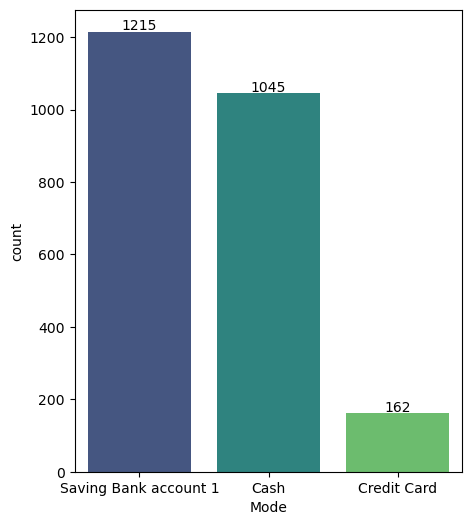

In [21]:
# Mode type distribution

plt.figure(figsize = (5,6))
ax = sns.countplot(data = Daily_Transactions, x = "Mode", order = Daily_Transactions["Mode"].value_counts().iloc[:3].index, palette="viridis")

# Add labels on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 5,             
            int(p.get_height()),            
            ha='center')
    
plt.show()

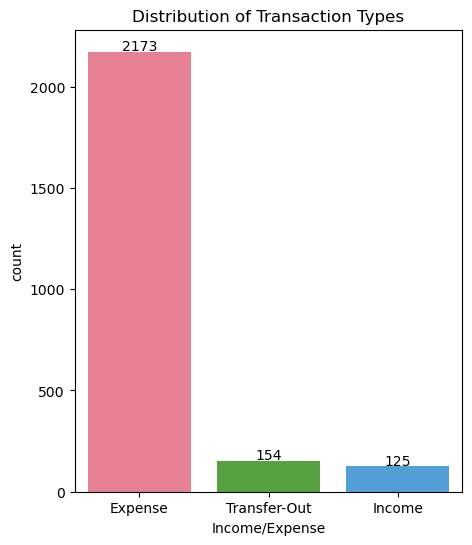

In [23]:
# Transaction type distribution
plt.figure(figsize=(5, 6))
ax = sns.countplot(x='Income/Expense', data=Daily_Transactions, palette=sns.color_palette("husl", n_colors=Daily_Transactions['Income/Expense'].nunique()))
plt.title('Distribution of Transaction Types')

# Add labels on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 5,             
            int(p.get_height()),            
            ha='center')
plt.show()

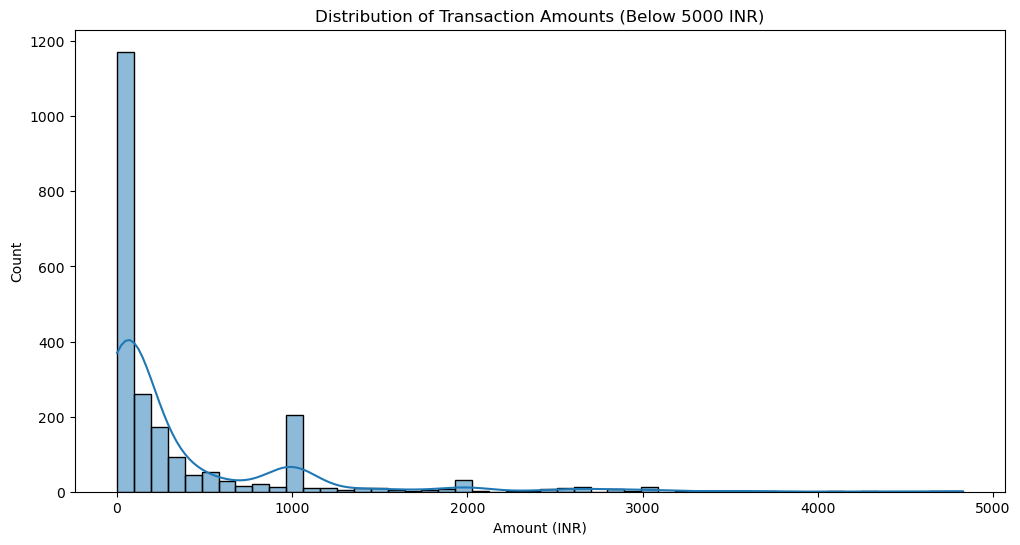

In [25]:
### Distribution of Transaction Amounts
# Plot distribution of amounts
plt.figure(figsize=(12, 6))
sns.histplot(Daily_Transactions[Daily_Transactions['Amount'] < 5000]['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts (Below 5000 INR)')
plt.xlabel('Amount (INR)')
plt.show()

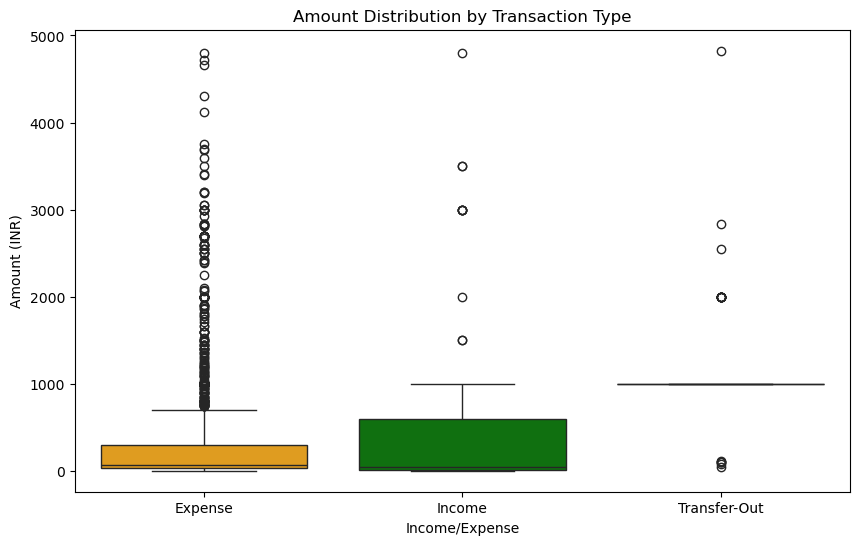

In [27]:
# Boxplot of amounts by transaction type
plt.figure(figsize=(10, 6))
team_colors = {'Expense': 'orange', 'Income': 'green', 'Transfer-Out': 'steelblue'}
ax = sns.boxplot(
    x='Income/Expense', 
    y='Amount', 
    data=Daily_Transactions[Daily_Transactions['Amount'] < 5000],
    hue="Income/Expense", palette=team_colors)

ax.set_xlabel("Income/Expense")
ax.set_ylabel("Amount (INR)")
ax.set_title("Amount Distribution by Transaction Type")

plt.title('Amount Distribution by Transaction Type')
plt.show()

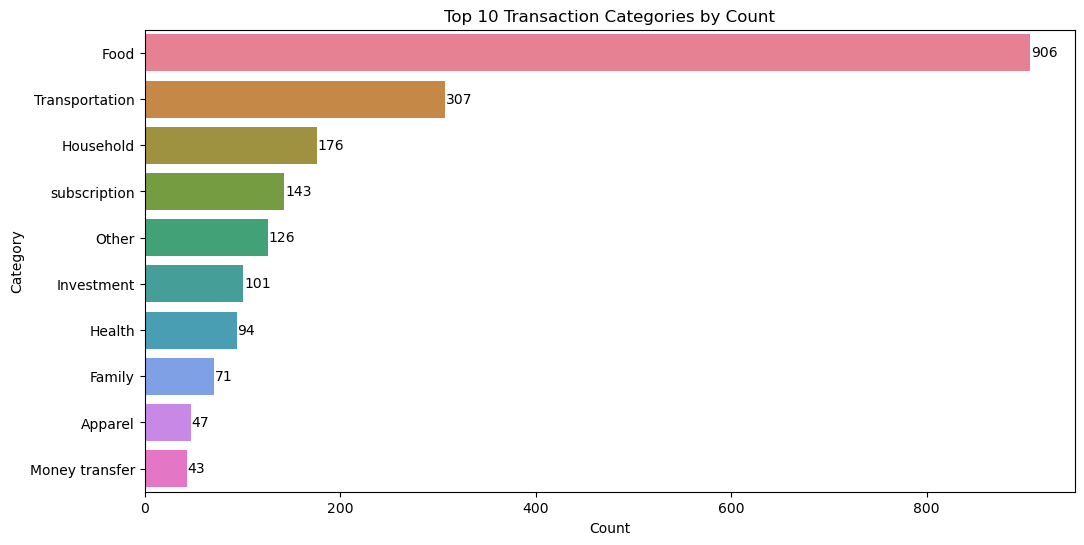

In [29]:
### Transaction Counts by Category
# Top 10 transaction categories
top_categories = Daily_Transactions['Category'].value_counts().head(10)

plt.figure(figsize=(12, 6))

# Create bar plot with different colors
ax = sns.barplot(
    x=top_categories.values, 
    y=top_categories.index, 
    palette=sns.color_palette("husl", n_colors=len(top_categories))
)

# Add labels on bars
for p in ax.patches:
    ax.text(p.get_width() + 1, 
            p.get_y() + p.get_height() / 2,
            int(p.get_width()), ha='left', va='center')

plt.title('Top 10 Transaction Categories by Count')
plt.xlabel('Count')

plt.show()

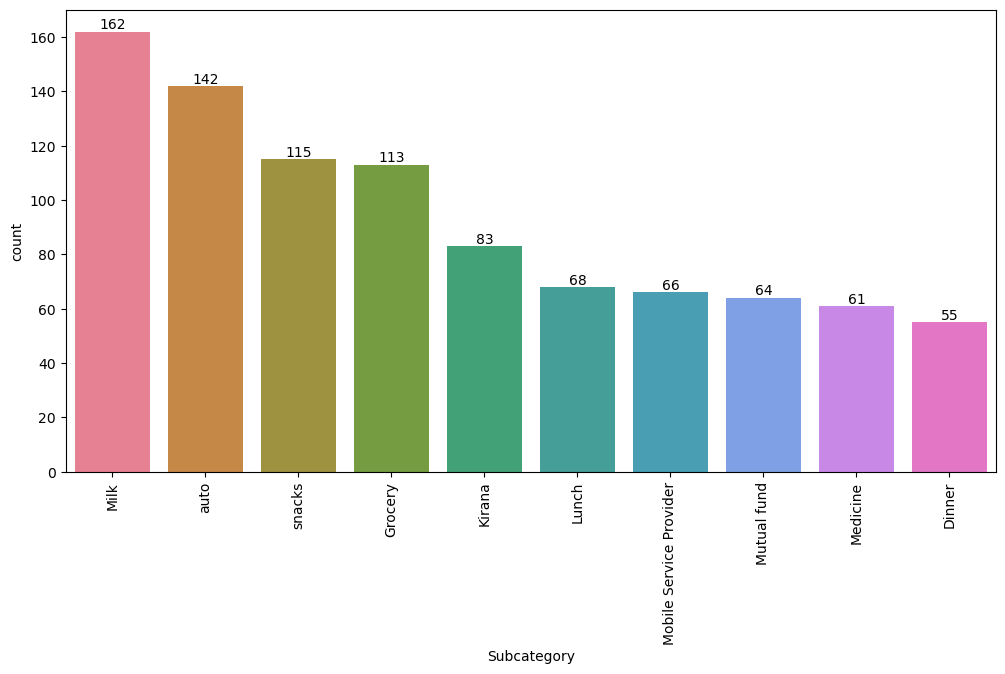

In [33]:
# Top 10 transaction subcategories

plt.figure(figsize=(12, 6))
filtered_data = Daily_Transactions[Daily_Transactions["Subcategory"] != "None"]
top_subcategories = filtered_data["Subcategory"].value_counts().iloc[:10].index

# Create a count plot with different colors for each bar
ax = sns.countplot(
    data=filtered_data, 
    x="Subcategory", 
    order=top_subcategories, 
    palette=sns.color_palette("husl", n_colors=len(top_subcategories))  # Different colors
)

# Add labels on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 1,             
            int(p.get_height()), ha='center')

plt.xticks(rotation=90)
plt.show()

# Step 4: Time Series Analysis

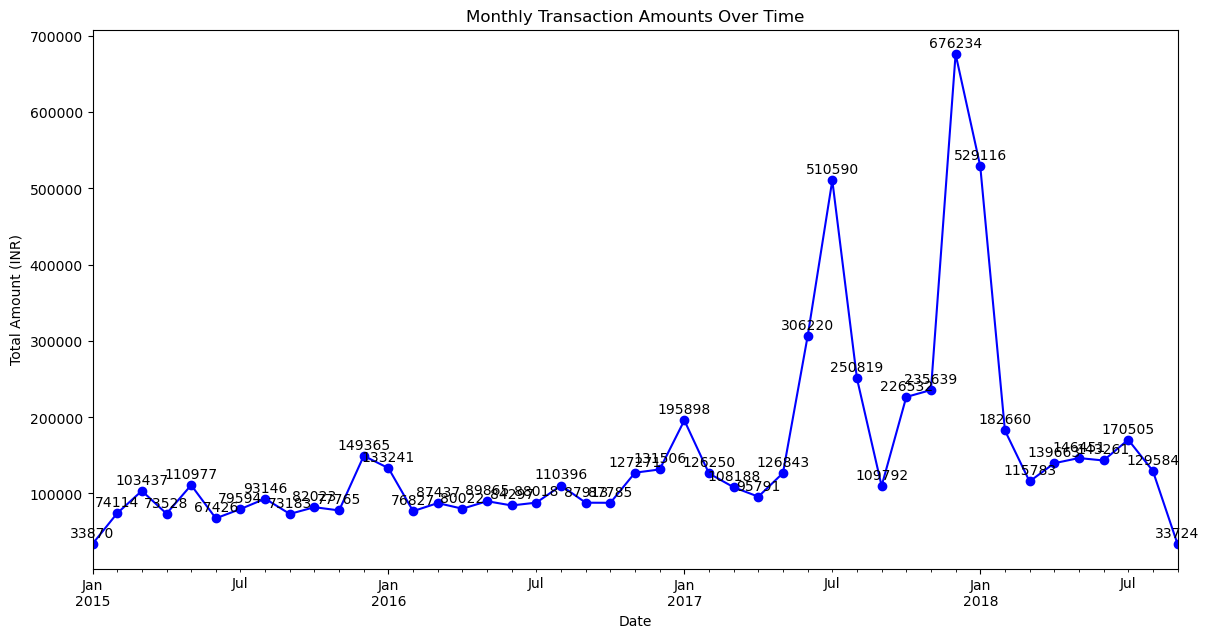

In [41]:
### Monthly Trends
# Create a time series dataframe
Daily_Transactions_ts = Daily_Transactions.set_index('Date')

# Monthly income and expenses
monthly = Daily_Transactions_ts.resample('M').agg({
    'Amount': 'sum',
    'Income/Expense': lambda x: (x == 'Income').sum()
})

# Plot monthly trends
plt.figure(figsize=(14, 7))
monthly['Amount'].plot(marker='o', linestyle='-', color='b', markersize=6)

# Add labels at each data point
for i, value in enumerate(monthly['Amount']):
    plt.annotate(f'{int(value)}',  
                 (monthly.index[i], value), 
                 textcoords="offset points", 
                 xytext=(0, 5), ha='center')
    
plt.title('Monthly Transaction Amounts Over Time')
plt.ylabel('Total Amount (INR)')
plt.show()

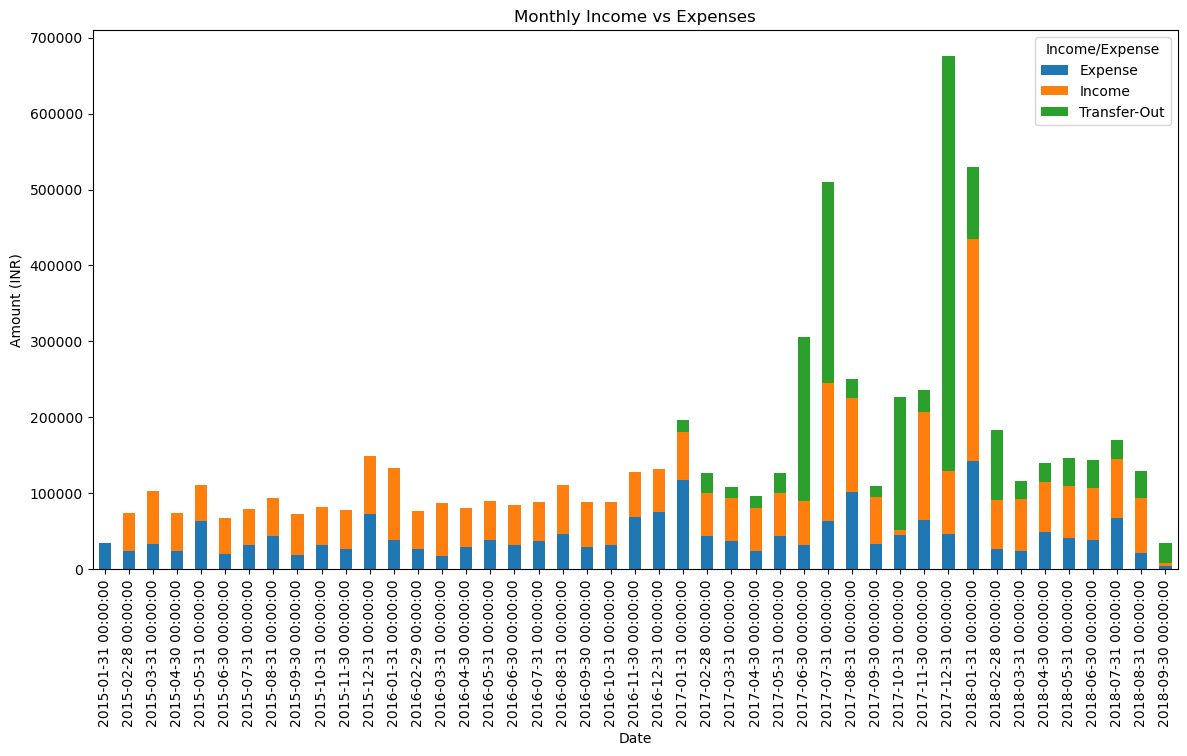

In [145]:
# Separate income and expenses
monthly_breakdown = Daily_Transactions_ts.groupby([pd.Grouper(freq='M'), 'Income/Expense'])['Amount'].sum().unstack()
monthly_breakdown.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Monthly Income vs Expenses')
plt.ylabel('Amount (INR)')
plt.show()

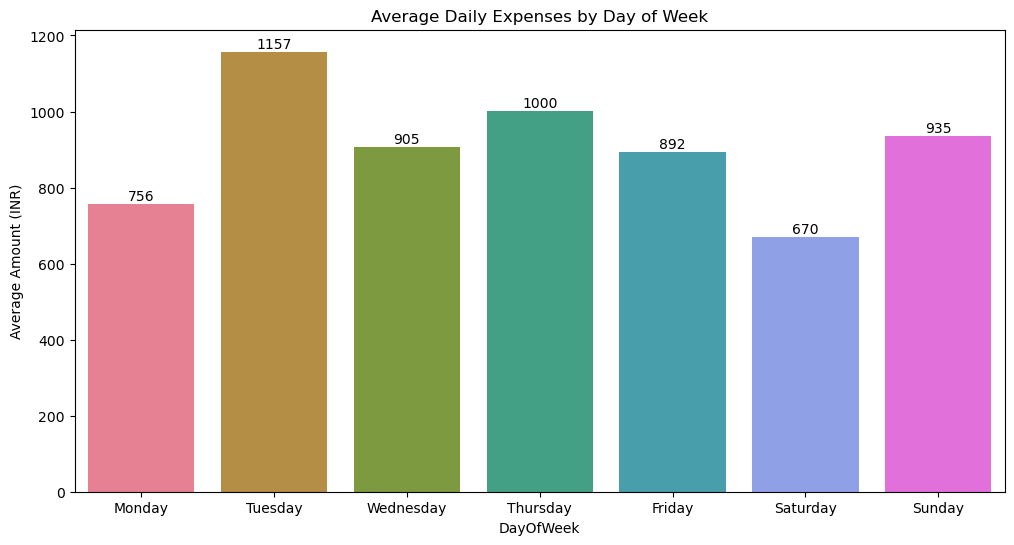

In [67]:
### Daily Trends
# Daily spending patterns
daily_patterns = Daily_Transactions_ts[Daily_Transactions_ts['Income/Expense'] == 'Expense'].groupby('DayOfWeek')['Amount'].mean()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=daily_patterns.index, y=daily_patterns.values, order=days_order, palette=sns.color_palette("husl", n_colors=len(days_order)))

# Add labels on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 10,             
            int(p.get_height()), ha='center')
    
plt.title('Average Daily Expenses by Day of Week')
plt.ylabel('Average Amount (INR)')
plt.show()

# Step 5: Correlation Analysis

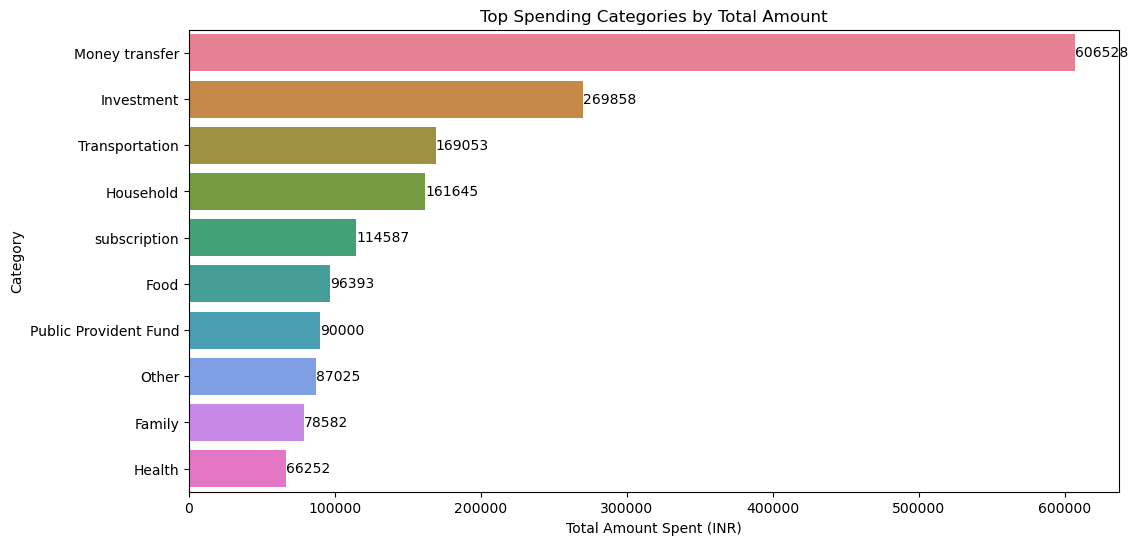

In [73]:
### Category Analysis

# Top spending categories
top_spending = Daily_Transactions[Daily_Transactions['Income/Expense'] == 'Expense'].groupby('Category')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_spending.values, y=top_spending.index, palette=sns.color_palette("husl", n_colors=len(top_spending)))

# Add labels on bars
for p in ax.patches:
    ax.text(p.get_width() + 1, 
            p.get_y() + p.get_height() / 2,
            int(p.get_width()), ha='left', va='center')
    
plt.title('Top Spending Categories by Total Amount')
plt.xlabel('Total Amount Spent (INR)')
plt.show()

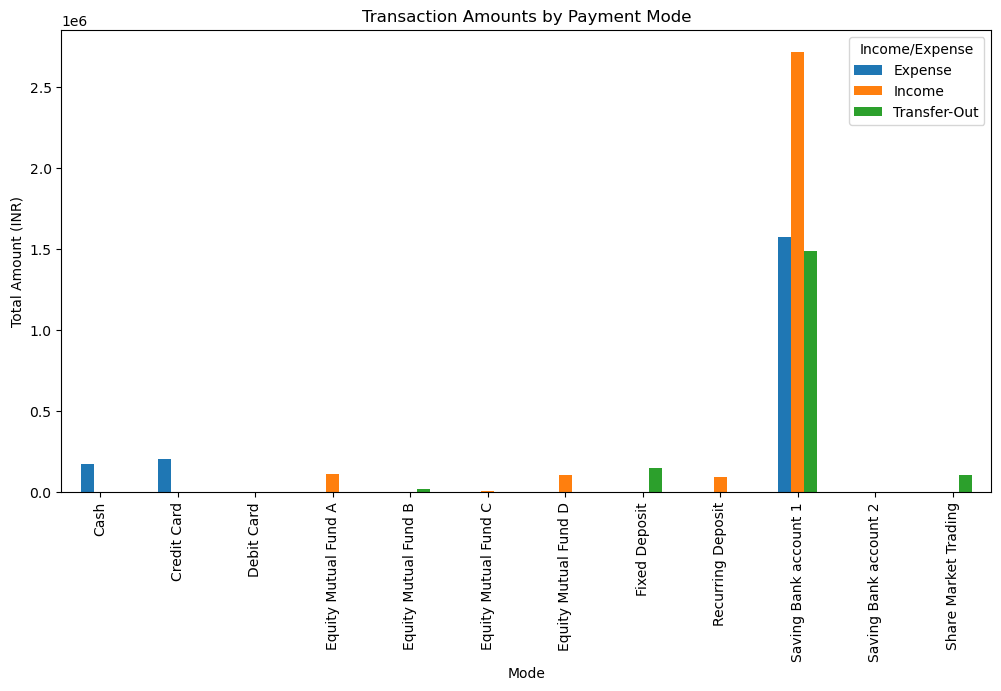

In [169]:
# Payment mode analysis
payment_mode = Daily_Transactions.groupby(['Mode', 'Income/Expense'])['Amount'].sum().unstack()
payment_mode.plot(kind='bar', figsize=(12, 6))
plt.title('Transaction Amounts by Payment Mode')
plt.ylabel('Total Amount (INR)')
plt.show()

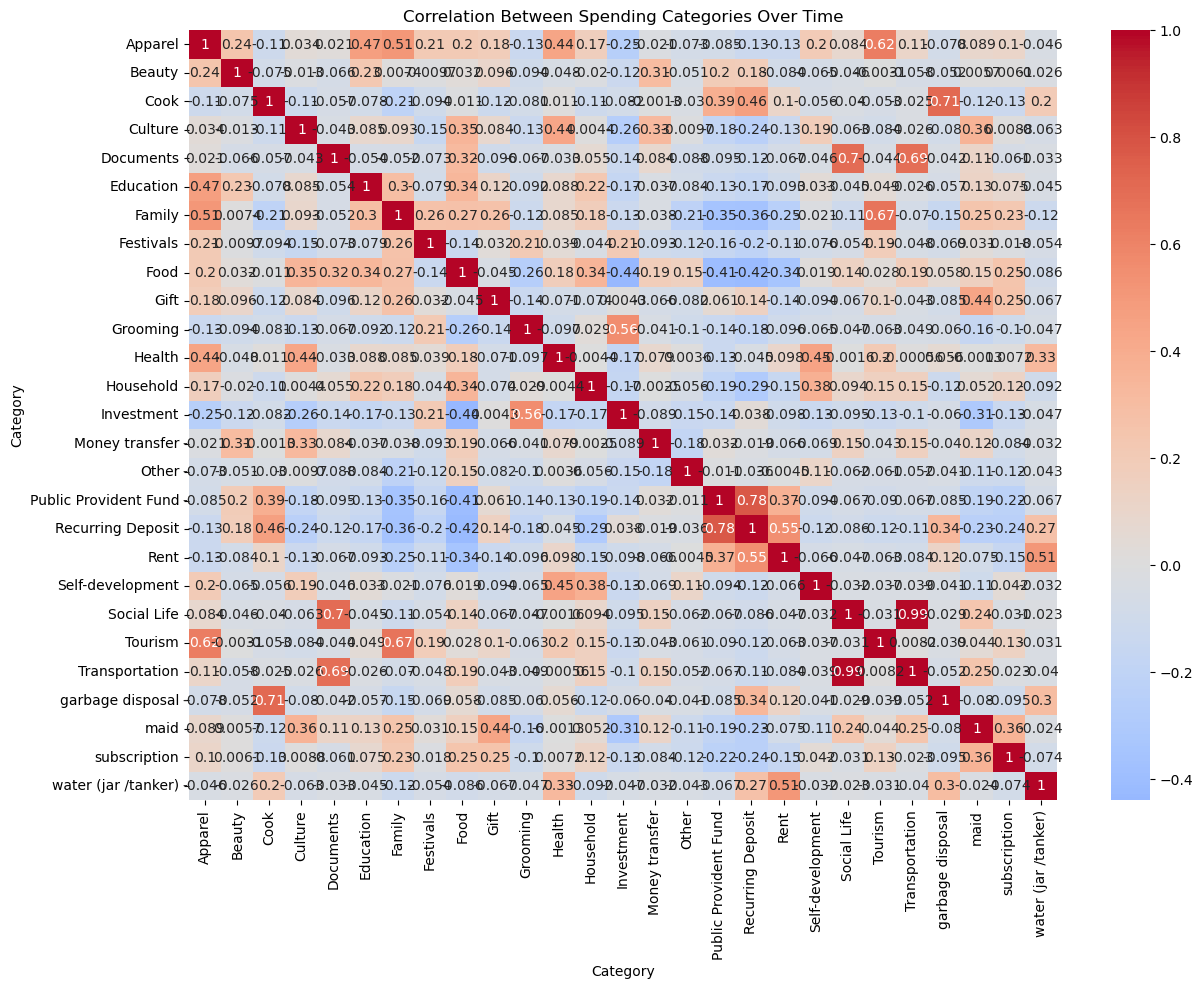

In [171]:
### Correlation Heatmap (Monthly Data)
# Create a pivot table for correlation analysis
monthly_categories = Daily_Transactions_ts[Daily_Transactions_ts['Income/Expense'] == 'Expense'].groupby([
    pd.Grouper(freq='M'), 'Category'
])['Amount'].sum().unstack().fillna(0)

# Calculate correlation matrix
corr_matrix = monthly_categories.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Spending Categories Over Time')
plt.show()

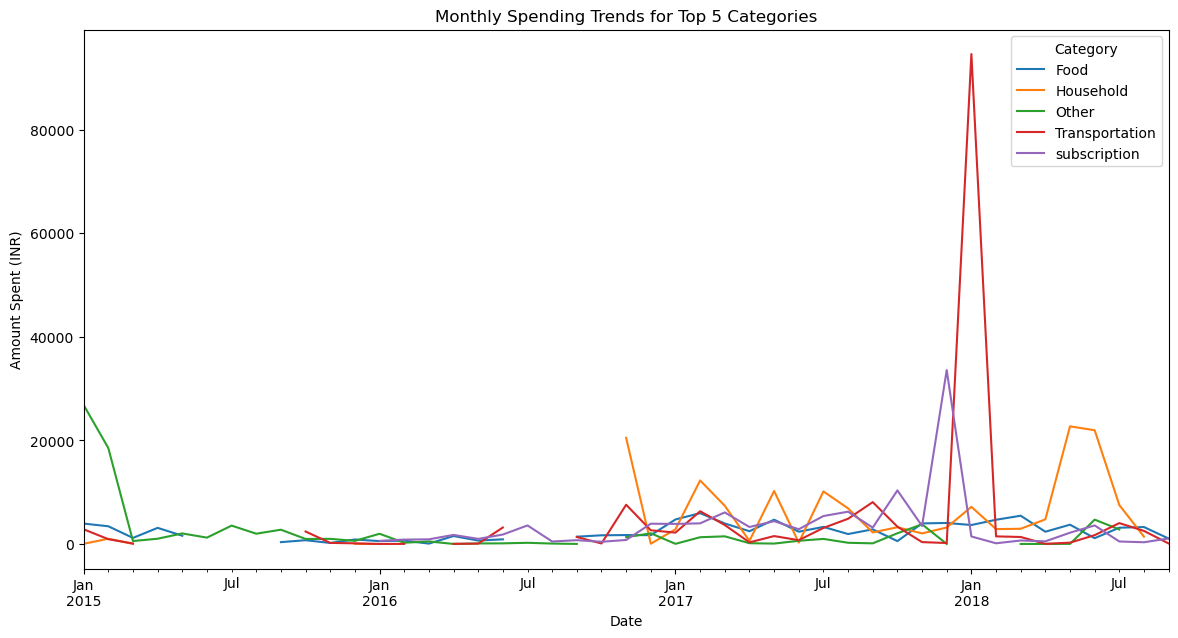

In [175]:
### Expense Breakdown by Category Over Time
# Top 5 expense categories over time
top5_categories = Daily_Transactions[Daily_Transactions['Income/Expense'] == 'Expense']['Category'].value_counts().head(5).index
df_top5 = Daily_Transactions_ts[(Daily_Transactions_ts['Income/Expense'] == 'Expense') & (Daily_Transactions_ts['Category'].isin(top5_categories))]

monthly_top5 = df_top5.groupby([pd.Grouper(freq='M'), 'Category'])['Amount'].sum().unstack()

monthly_top5.plot(figsize=(14, 7))
plt.title('Monthly Spending Trends for Top 5 Categories')
plt.ylabel('Amount Spent (INR)')
plt.show()